## Transfer Learning Officical Practical Commencement by `Mr. Harshit Dawar`!

### Downloading the food dataset (coloured one)!

In [7]:
# Downloading the dataset
!wget "https://onedrive.live.com/download?cid=86213B68AE250972&resid=86213B68AE250972%2129101&authkey=ANqUGrvowv3Jt7M" -O food_data.zip

--2021-07-31 08:36:12--  https://onedrive.live.com/download?cid=86213B68AE250972&resid=86213B68AE250972%2129101&authkey=ANqUGrvowv3Jt7M
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ohlmhg.sn.files.1drv.com/y4msAAPi2PfSdUOoBKpxQTk3uplJSO5PuyYgfv3MH81ZvK6ZZcUtfTPfOANDSDM1lEDdHuTnyuvtmg0Xztf3XZKf7_yMDsLKJO3mbaLwdllbmtLKQZtd8pKVlUqbX0faKqljvWhZZVSBdO9H58YsHBZuutR8LfulLN8FbdP95lDjbFvl18hfxoioIK8jo1oQBT-ciEnVN_gcGX5IS6pwgx5gA/10_food_classes_10_percent.zip?download&psid=1 [following]
--2021-07-31 08:36:13--  https://ohlmhg.sn.files.1drv.com/y4msAAPi2PfSdUOoBKpxQTk3uplJSO5PuyYgfv3MH81ZvK6ZZcUtfTPfOANDSDM1lEDdHuTnyuvtmg0Xztf3XZKf7_yMDsLKJO3mbaLwdllbmtLKQZtd8pKVlUqbX0faKqljvWhZZVSBdO9H58YsHBZuutR8LfulLN8FbdP95lDjbFvl18hfxoioIK8jo1oQBT-ciEnVN_gcGX5IS6pwgx5gA/10_food_classes_10_percent.zip?download&psid=1
Resolving ohlmhg.sn.fil

In [ ]:
# Extracting the Dataset
!unzip food_data.zip

## Starting the Project

In [9]:
# Importing the required Libraries
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as tf_hub

In [12]:
# Checking the no. of Images of each category
for directory_path, directory_name, filenames  in os.walk("10_food_classes_10_percent"):
  print("There are {} no. of Images and {} no. of Directories in {}".format(len(filenames), len(directory_name), directory_path))

There are 0 no. of Images and 2 no. of Directories in 10_food_classes_10_percent
There are 0 no. of Images and 10 no. of Directories in 10_food_classes_10_percent/train
There are 75 no. of Images and 0 no. of Directories in 10_food_classes_10_percent/train/ice_cream
There are 75 no. of Images and 0 no. of Directories in 10_food_classes_10_percent/train/chicken_curry
There are 75 no. of Images and 0 no. of Directories in 10_food_classes_10_percent/train/ramen
There are 75 no. of Images and 0 no. of Directories in 10_food_classes_10_percent/train/hamburger
There are 75 no. of Images and 0 no. of Directories in 10_food_classes_10_percent/train/grilled_salmon
There are 75 no. of Images and 0 no. of Directories in 10_food_classes_10_percent/train/chicken_wings
There are 75 no. of Images and 0 no. of Directories in 10_food_classes_10_percent/train/sushi
There are 75 no. of Images and 0 no. of Directories in 10_food_classes_10_percent/train/fried_rice
There are 75 no. of Images and 0 no. of D

In [13]:
# Creating a Reference to Training & Testing Data!

training_data_path = "10_food_classes_10_percent/train"
testing_data_path = "10_food_classes_10_percent/test"

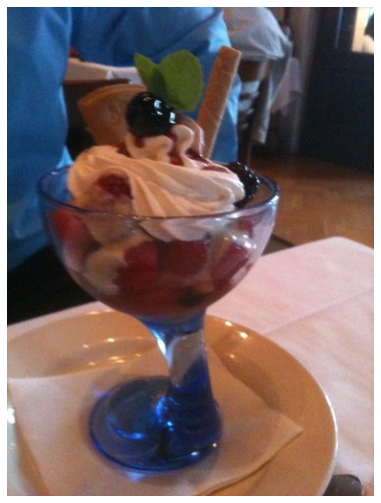

In [16]:
image = tf.keras.preprocessing.image.load_img("10_food_classes_10_percent/train/ice_cream/104465.jpg")
plt.figure(figsize = (15, 9))
plt.imshow(image)
plt.axis(False)
plt.show()

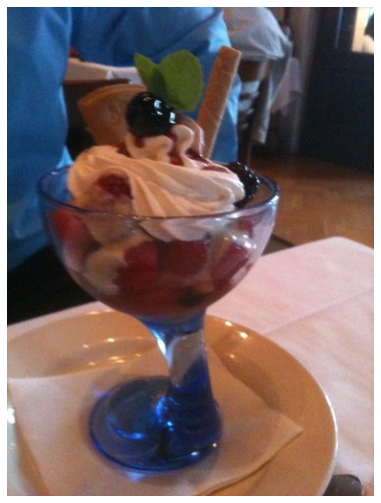

In [17]:
image = plt.imread("10_food_classes_10_percent/train/ice_cream/104465.jpg")
plt.figure(figsize = (15, 9))
plt.imshow(image)
plt.axis(False)
plt.show()

In [59]:
# Normalizing the Dataset & Creating Training & Testing Data Generator!
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_data_gen = ImageDataGenerator(rescale = 1/255.0)
testing_data_gen = ImageDataGenerator(rescale = 1/255.0)

image_size = (224, 224)     # Number of channels is not required here too mention
batch_size = 35

training_data = training_data_gen.flow_from_directory(
                                                      training_data_path,
                                                      class_mode = "categorical",
                                                      target_size = image_size,
                                                      batch_size = batch_size
                                                      )

testing_data = testing_data_gen.flow_from_directory(
                                                      testing_data_path,
                                                      class_mode = "categorical",
                                                      target_size = image_size,
                                                      batch_size = batch_size
                                                      )

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Geenrating A Transfer Learning Model (MobileNet V3) [Feature Extraction Transfer Learning]

In [60]:
# Creating a Transfer Learning Model Layer
MobileNet_V3_Layer = tf_hub.KerasLayer(
                                      "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
                                       trainable = False,      # I am asking to do not train the hidden layers, freezing them
                                       input_shape = (224, 224, 3)
                                       )


In [61]:
# Generating the Model
TF_Model_MobileNet_V3 = tf.keras.models.Sequential([
                                                   MobileNet_V3_Layer,
                                                   tf.keras.layers.Dense(units = 10, activation = "softmax")
])

In [62]:
TF_Model_MobileNet_V3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1024)              1529968   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 1,540,218
Trainable params: 10,250
Non-trainable params: 1,529,968
_________________________________________________________________


In [63]:
# Compiling & Training the Model
TF_Model_MobileNet_V3.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

TF_Model_MobileNet_V3.fit(training_data, epochs = 10, validation_data = testing_data)

Epoch 1/10
22/22 [==============================] - 47s 671ms/step - loss: 2.0403 - accuracy: 0.3027 - val_loss: 1.5528 - val_accuracy: 0.5592
Epoch 2/10
22/22 [==============================] - 13s 631ms/step - loss: 1.2643 - accuracy: 0.6680 - val_loss: 1.1006 - val_accuracy: 0.7184
Epoch 3/10
22/22 [==============================] - 13s 624ms/step - loss: 0.9168 - accuracy: 0.7893 - val_loss: 0.8940 - val_accuracy: 0.7704
Epoch 4/10
22/22 [==============================] - 14s 667ms/step - loss: 0.7344 - accuracy: 0.8253 - val_loss: 0.7938 - val_accuracy: 0.7848
Epoch 5/10
22/22 [==============================] - 14s 651ms/step - loss: 0.6156 - accuracy: 0.8587 - val_loss: 0.7306 - val_accuracy: 0.7948
Epoch 6/10
22/22 [==============================] - 13s 617ms/step - loss: 0.5359 - accuracy: 0.8747 - val_loss: 0.6881 - val_accuracy: 0.8012
Epoch 7/10
22/22 [==============================] - 13s 621ms/step - loss: 0.4701 - accuracy: 0.8947 - val_loss: 0.6574 - val_accuracy: 0.8084

In [64]:
TF_Model_MobileNet_V3.evaluate(testing_data)

72/72 [==============================] - 11s 155ms/step - loss: 0.6066 - accuracy: 0.8200


[0.6066253185272217, 0.8199999928474426]